In [2]:
#Data Manipulation Library:
import pandas as pd

#Scientific computing library:
import numpy as np

#Plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sb
#Text Analysis Libraries:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [3]:
df=pd.read_csv("E:\\spark\\india-news-headlines.csv")
df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
df.shape

(3297172, 3)

In [5]:
#Spliting the dataset into train and test set
train=df[df['publish_date'] < 20180101]
test=df[df['publish_date'] > 20180101]

In [6]:
#Replace the non charecters with space
data=train['headline_text']
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

C:\Users\mudra\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
#Making all the text in lower letter
df['headline_text'] = df['headline_text'].str.lower()

In [8]:
stop=set(stopwords.words('english'))
corpus=[]
new= df['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

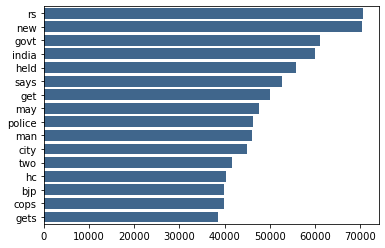

In [9]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

In [10]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

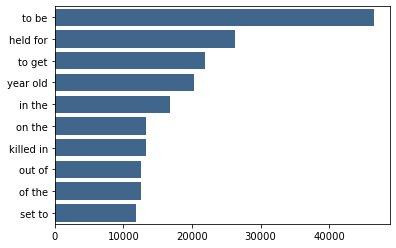

In [11]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sb.barplot(x=y,y=x,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

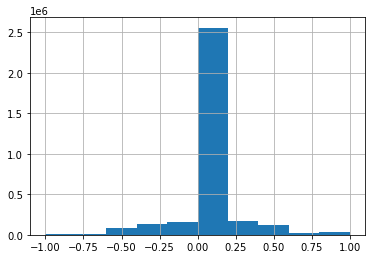

In [12]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()
plt.show()

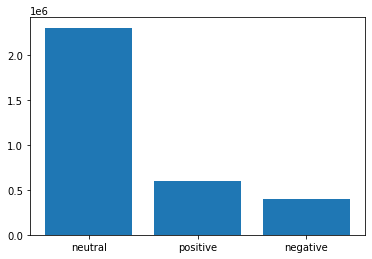

In [13]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity.value_counts().index,df.polarity.value_counts())
plt.show()

In [14]:
df[df['polarity']=='positive']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  extra buses to clear tourist traffic
13          will qureshi's return really help the govt?
31                 extra buses to clear tourist traffic
39          will qureshi's return really help the govt?
Name: headline_text, dtype: object

In [15]:
df[df['polarity']=='negative']['headline_text'].head()

66         destroying myths and doubts on sexuality
87         powerless north india gropes in the dark
105                        10-year-old girl missing
132              net lottery: a winner or a sucker?
143    mental illness can pass from parent to child
Name: headline_text, dtype: object